In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift

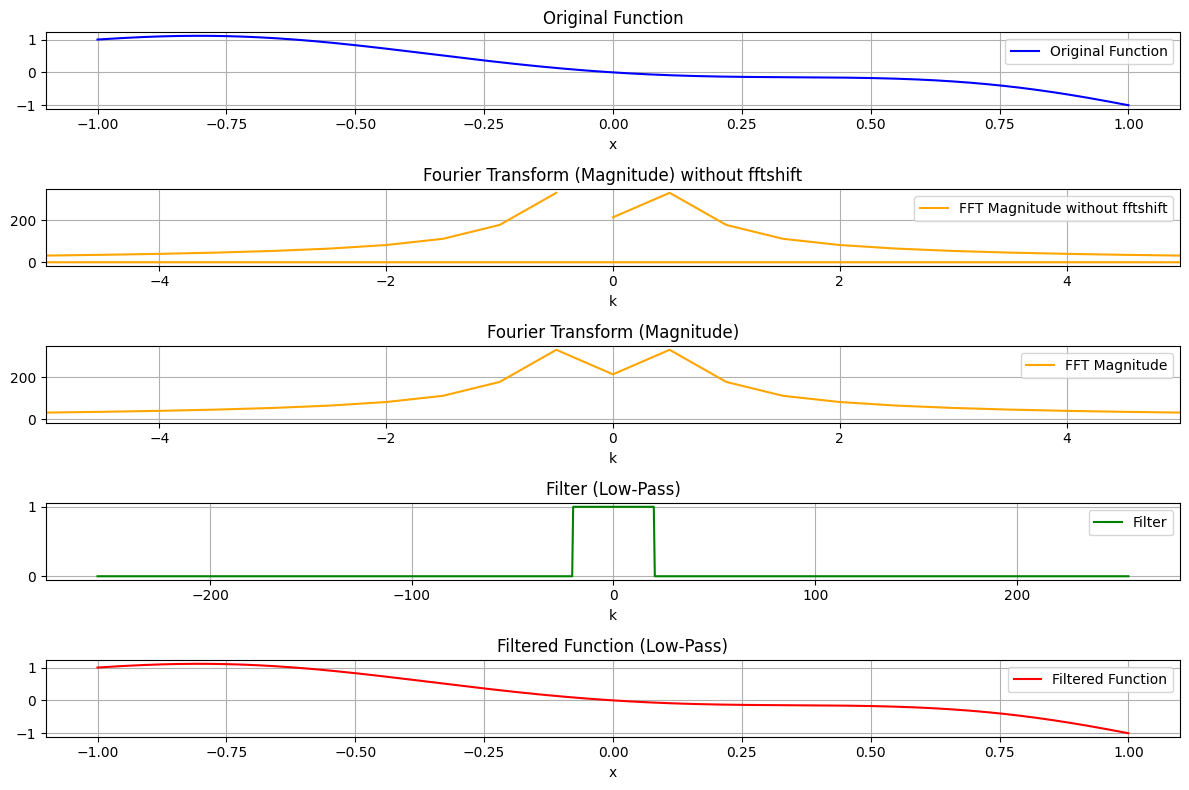

In [13]:
# Define the polynomial function
x = np.linspace(-1, 1, 1024)  # High-resolution sample points
f_x = x**6 - 3*x**4 + 2*x**2 - x  # 6th-order polynomial

# Compute the Fourier transform using scipy.fft
fft_f = fft(f_x)
freq = fftfreq(len(x), d=((x[1] - x[0])))  # Frequency bins, correctly scaled (if not scaled, the frequency spacing will default to 1, which wrong)

# Define a low-pass filter
cutoff = 20  # Define the cutoff frequency
filter_mask = np.abs(freq) <= cutoff  # Boolean mask for frequencies
filtered_fft_f = fft_f * filter_mask  # Apply the filter
filtered_fft_f= fft_f

# Compute the inverse Fourier transform to reconstruct the filtered signal
filtered_f_x = ifft(filtered_fft_f)

# Plot the results
plt.figure(figsize=(12, 8))

# Original function
plt.subplot(5, 1, 1)
plt.plot(x, f_x, label="Original Function", color='blue')
plt.xlabel("x")
plt.title("Original Function")
plt.grid()
plt.legend()

# Fourier Transform (Magnitude) with fftshift
plt.subplot(5, 1, 2)
plt.plot(freq, np.abs(fft_f), label="FFT Magnitude without fftshift", color='orange')
plt.title("Fourier Transform (Magnitude) without fftshift")
plt.xlabel("k")
plt.xlim(-5, 5)
plt.grid()
plt.legend()


# Fourier Transform (Magnitude)
plt.subplot(5, 1, 3)
plt.plot(fftshift(freq), fftshift(np.abs(fft_f)), label="FFT Magnitude", color='orange')
plt.title("Fourier Transform (Magnitude)")
plt.xlabel("k")
plt.xlim(-5, 5)
plt.grid()
plt.legend()

# Filter
plt.subplot(5, 1, 4)
plt.plot(fftshift(freq), fftshift(filter_mask), label="Filter", color='green')
plt.title("Filter (Low-Pass)")
plt.xlabel("k")
plt.grid()
plt.legend()

# Filtered function
plt.subplot(5, 1, 5)
plt.plot(x, np.real(filtered_f_x), label="Filtered Function", color='red')
plt.title("Filtered Function (Low-Pass)")
plt.xlabel("x")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()